<a href="https://colab.research.google.com/github/nrajmalwar/Project/blob/master/Session%203/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nishad Rajmalwar, Batch F6, nrajmalwar@gmail.com

# **Import Libraries and modules**

Install and import keras library

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Important important APIs, functions and libraries

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D, SeparableConv2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

### Load pre-shuffled MNIST data into train and test sets

Load and split the data into training and test set

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Print the shape of X_train (examples of the dataset) and plot the first image

(60000, 28, 28)


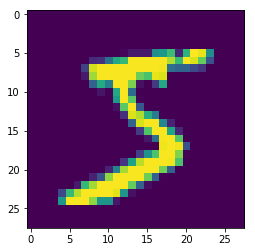

In [39]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Reshape the X_train and X_test to (m,  28, 28, 1) tensor

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Change the values of X_train, X_test to float32 and normalize them between 0 and 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Print the first 10 elements of y_train which contains the class labels for X_train

In [42]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert the values of Y_train and Y_test to one-hot vectors

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [44]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#Image Augmentation

Apply image augmentation like rotation, width and height shift, shear and zoom

In [0]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10,
    height_shift_range=0.10,
    shear_range=0.10,
    zoom_range=0.10)

#Model Building

Build a simple convolution model

In [46]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(SeparableConv2D(64, 3, 3, activation='relu'))
model.add(SeparableConv2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32, 1, activation='relu'))
model.add(SeparableConv2D(64, 3, 3, activation='relu'))
model.add(SeparableConv2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1))
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), activation="relu")`
  # This

Print the model summary

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
separable_conv2d_28 (Separab (None, 24, 24, 64)        2400      
_________________________________________________________________
separable_conv2d_29 (Separab (None, 22, 22, 64)        4736      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 32)        2080      
_________________________________________________________________
separable_conv2d_30 (Separab (None, 9, 9, 64)          2400      
_________________________________________________________________
separable_conv2d_31 (Separab (None, 7, 7, 64)          4736      
__________

Compile the model with the loss function, the optimizer and the metrics used

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Use Google drive to save the model

In [49]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Use checkpointer as a callback

In [0]:
checkpoint = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/EVA_Asgn_3.hdf5', monitor='acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

#Model Training

Fit the model on X_train and Y_train for 30 epochs with a batch size of 256

In [51]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=256),
                    steps_per_epoch=len(X_train) / 32, epochs=30, verbose=1, callbacks=[checkpoint])

Epoch 1/30
1875/1875 [==============================] - 124s 66ms/step - loss: 0.7966 - acc: 0.7258

Epoch 00001: acc improved from -inf to 0.72575, saving model to /content/drive/My Drive/Colab Notebooks/EVA_Asgn_3.hdf5
Epoch 2/30
1875/1875 [==============================] - 125s 67ms/step - loss: 0.1894 - acc: 0.9438

Epoch 00002: acc improved from 0.72575 to 0.94381, saving model to /content/drive/My Drive/Colab Notebooks/EVA_Asgn_3.hdf5
Epoch 3/30
1875/1875 [==============================] - 124s 66ms/step - loss: 0.1322 - acc: 0.9603

Epoch 00003: acc improved from 0.94381 to 0.96033, saving model to /content/drive/My Drive/Colab Notebooks/EVA_Asgn_3.hdf5
Epoch 4/30
1875/1875 [==============================] - 125s 67ms/step - loss: 0.1021 - acc: 0.9690

Epoch 00004: acc improved from 0.96033 to 0.96900, saving model to /content/drive/My Drive/Colab Notebooks/EVA_Asgn_3.hdf5
Epoch 5/30
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0825 - acc: 0.9749

Epoch 

Load the model

In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EVA_Asgn_3.hdf5')

Fit the model on X_train and Y_train for 20 epochs with a batch size of 256

In [53]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=256),
                    steps_per_epoch=len(X_train) / 32, epochs=20, verbose=1, callbacks=[checkpoint])

Epoch 1/20
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0151 - acc: 0.9953

Epoch 00001: acc improved from 0.99497 to 0.99527, saving model to /content/drive/My Drive/Colab Notebooks/EVA_Asgn_3.hdf5
Epoch 2/20
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0152 - acc: 0.9952

Epoch 00002: acc did not improve from 0.99527
Epoch 3/20
1875/1875 [==============================] - 125s 66ms/step - loss: 0.0141 - acc: 0.9955

Epoch 00003: acc improved from 0.99527 to 0.99551, saving model to /content/drive/My Drive/Colab Notebooks/EVA_Asgn_3.hdf5
Epoch 4/20
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0139 - acc: 0.9957

Epoch 00004: acc improved from 0.99551 to 0.99566, saving model to /content/drive/My Drive/Colab Notebooks/EVA_Asgn_3.hdf5
Epoch 5/20
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0134 - acc: 0.9957

Epoch 00005: acc improved from 0.99566 to 0.99570, saving model to /content/driv

#Model Evaluation

Evaluate the model on the test set

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Print the evaluation score of the model

In [57]:
print(score)

[0.019813496434506306, 0.9945]


Use the model to predict the class labels of test set

#Model Prediction

In [0]:
y_pred = model.predict(X_test)

Compare the predicted values and the actual values

In [59]:
print(y_pred[:9])
print(y_test[:9])

[[4.9331320e-11 1.0897819e-11 2.2904896e-08 1.9494177e-10 1.0216882e-10
  5.9025957e-12 1.0839606e-19 1.0000000e+00 6.8614423e-13 2.7860650e-10]
 [5.6315497e-10 1.0393516e-15 1.0000000e+00 1.4323253e-14 4.2148974e-15
  1.7442516e-12 2.8759257e-13 2.2015271e-13 1.1109296e-09 2.7806671e-13]
 [5.7108764e-07 9.9972993e-01 5.0110560e-09 7.2664563e-09 6.8348418e-05
  2.6451627e-07 3.2522134e-05 1.5732384e-04 2.5738325e-06 8.3854156e-06]
 [9.9999988e-01 9.2339140e-34 6.7398839e-15 2.5578834e-19 3.0691905e-23
  1.3782138e-13 1.2146675e-07 5.3036348e-22 1.9629799e-14 2.8666056e-12]
 [9.0540477e-24 5.1979986e-22 5.1411978e-17 3.2121917e-16 9.9999237e-01
  6.3593322e-20 8.9403021e-18 2.1740561e-18 7.2035700e-06 4.0652125e-07]
 [3.6239591e-08 9.9996972e-01 2.0075355e-10 2.1055442e-11 6.3407638e-06
  3.8489802e-09 8.4902985e-07 2.2882885e-05 4.8761422e-08 2.4094462e-07]
 [2.8186404e-23 1.3969295e-18 1.1244008e-19 4.8675624e-20 1.0000000e+00
  1.3861491e-17 7.2111075e-18 4.7987784e-11 2.9441098e-09 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

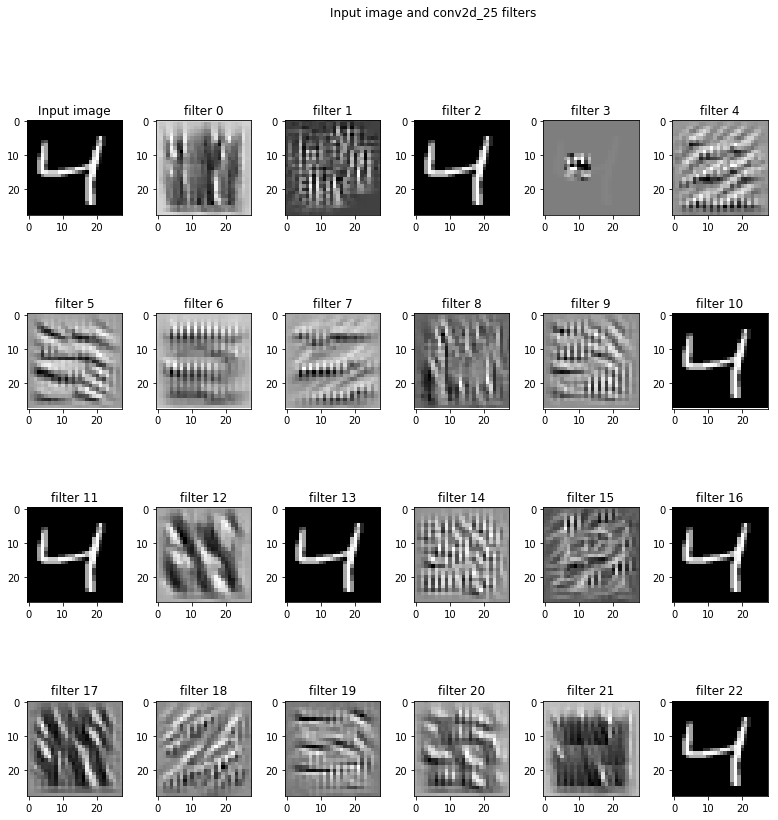

In [62]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_25'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()